In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('../data/preprocessed_predictive_maintenance.csv')

In [4]:
df.head()

,type,air_temperature,process_temp,rotational_speed_[rpm],torque_[nm],tool_wear_[min],target,failure_type
0,M,298.1,308.6,1551,42.8,0,0,no failure
1,L,298.2,308.7,1408,46.3,3,0,no failure
2,L,298.1,308.5,1498,49.4,5,0,no failure
3,L,298.2,308.6,1433,39.5,7,0,no failure
4,L,298.2,308.7,1408,40.0,9,0,no failure


## check the distribution of the target 

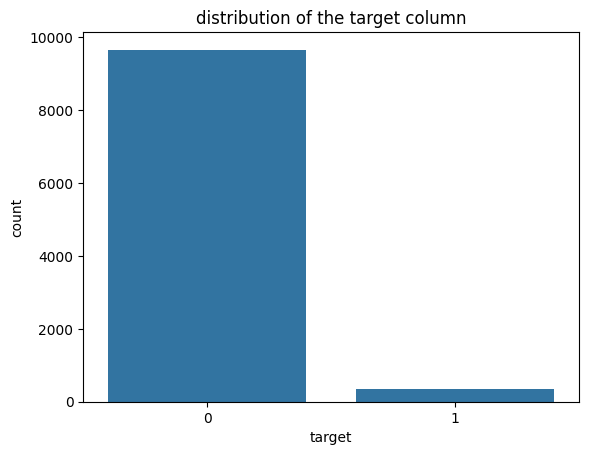

In [5]:
sns.barplot(df['target'].value_counts())
plt.title("distribution of the target column")
plt.show()


In [35]:
num_col = df.select_dtypes(exclude='object').columns.drop('target').to_list()
num_col

['air_temperature',
 'process_temp',
 'rotational_speed_[rpm]',
 'torque_[nm]',
 'tool_wear_[min]']

In [7]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['type', 'failure_type'], dtype='object')

### check distribution of numeric column

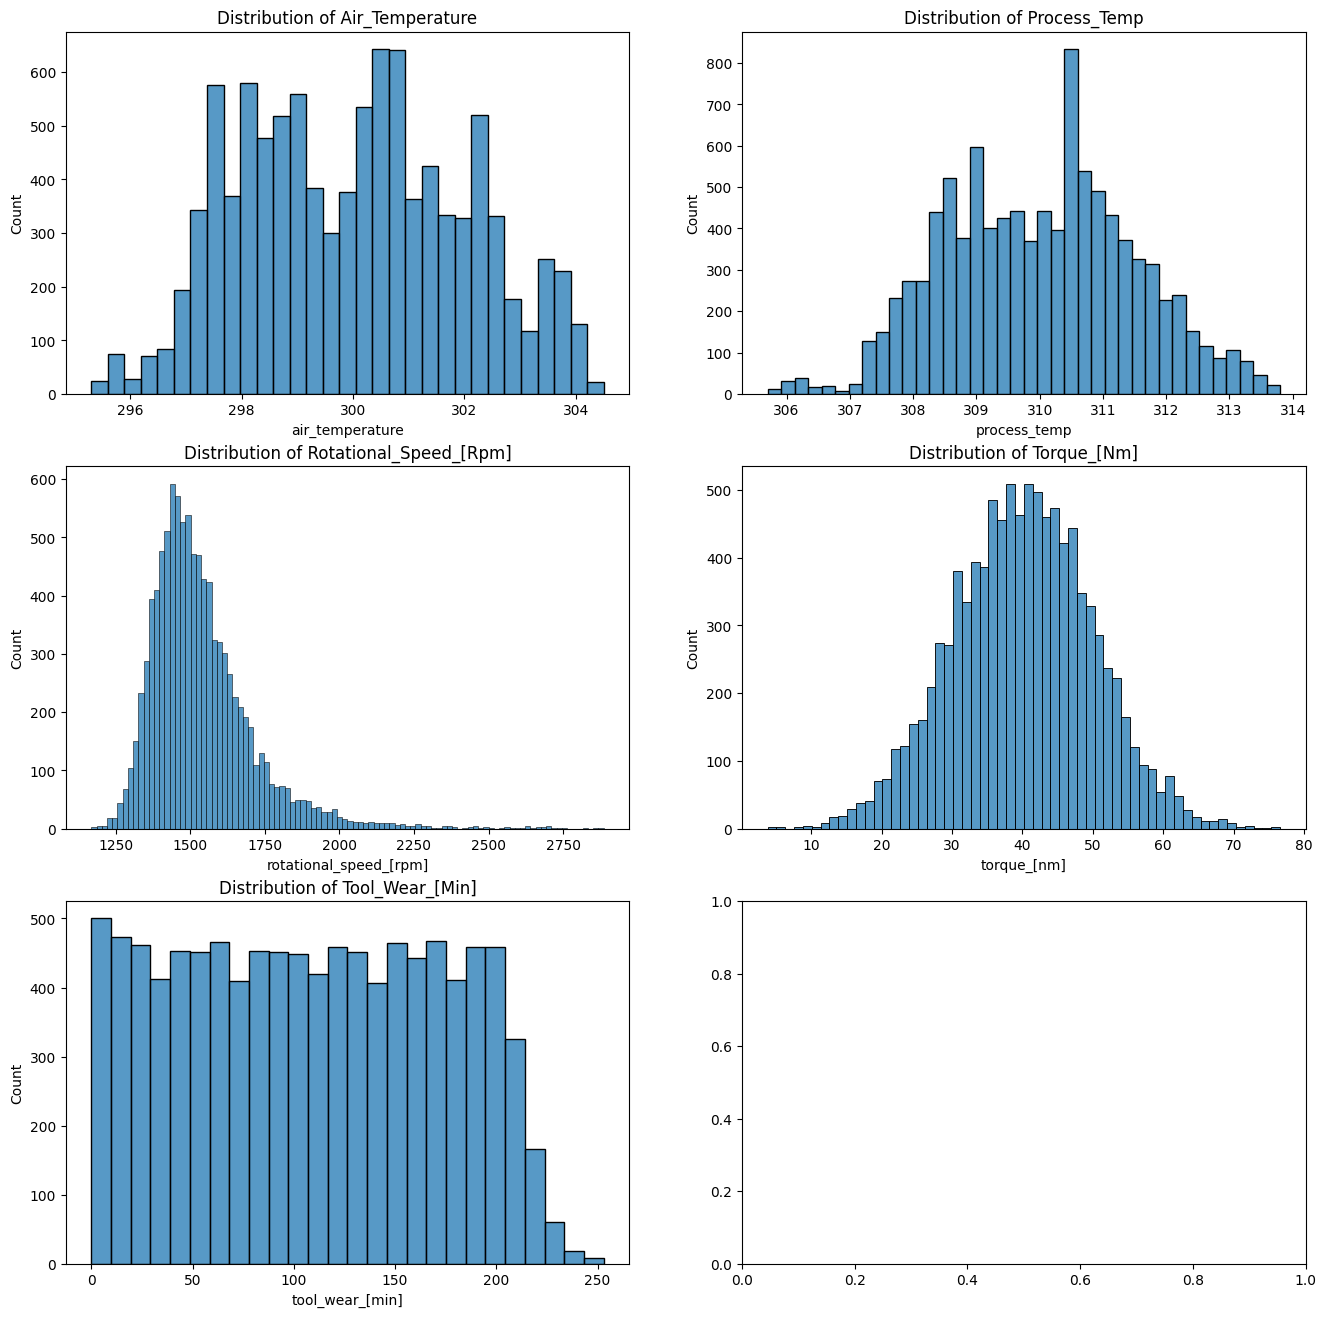

In [8]:
_,ax = plt.subplots(3,2,figsize=(16,16) )
ax = ax.ravel()

for ax_idx, num in enumerate(num_col):
    sns.histplot(df[num], ax=ax[ax_idx])
    ax[ax_idx].set_title(f"Distribution of {num.title()}")



### Distribution of categorical columns

=======Type=======
type
L    6000
M    2997
H    1003
Name: count, dtype: int64


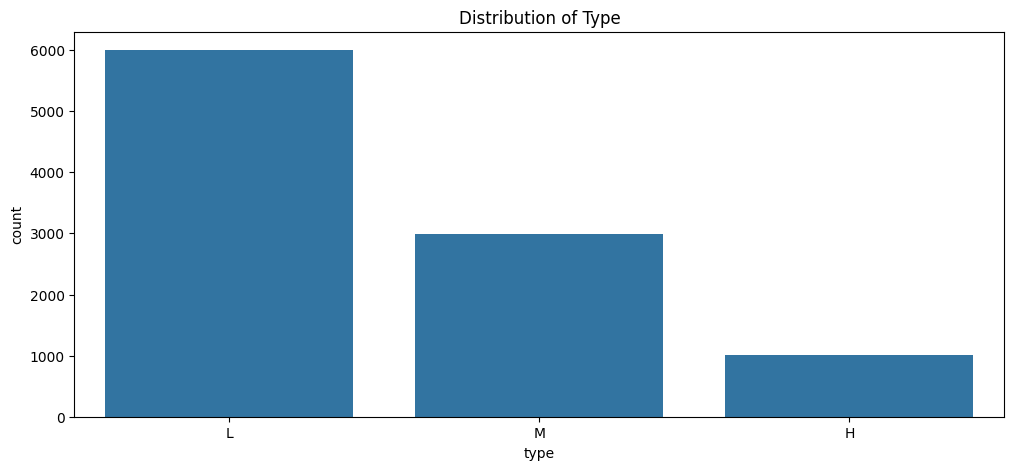

=======Failure_Type=======
failure_type
no failure                  9652
heat dissipation failure     112
power failure                 95
overstrain failure            78
tool wear failure             45
random failures               18
Name: count, dtype: int64


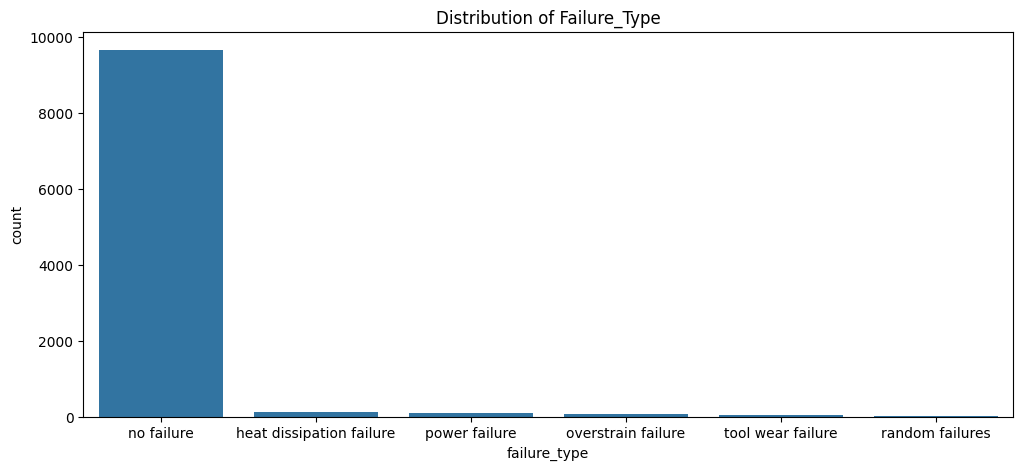

In [21]:
for cols in cat_cols:
    plt.figure(figsize=(12,5))
    cat_count = df[cols].value_counts()
    print(f'======={cols.title()}=======')
    print(cat_count)
    sns.barplot(cat_count)
  
    plt.title(f'Distribution of {cols.title()}')
    plt.show()

### Bivariate Analysis

Text(0.5, 1.0, 'Correlation btw num variable')

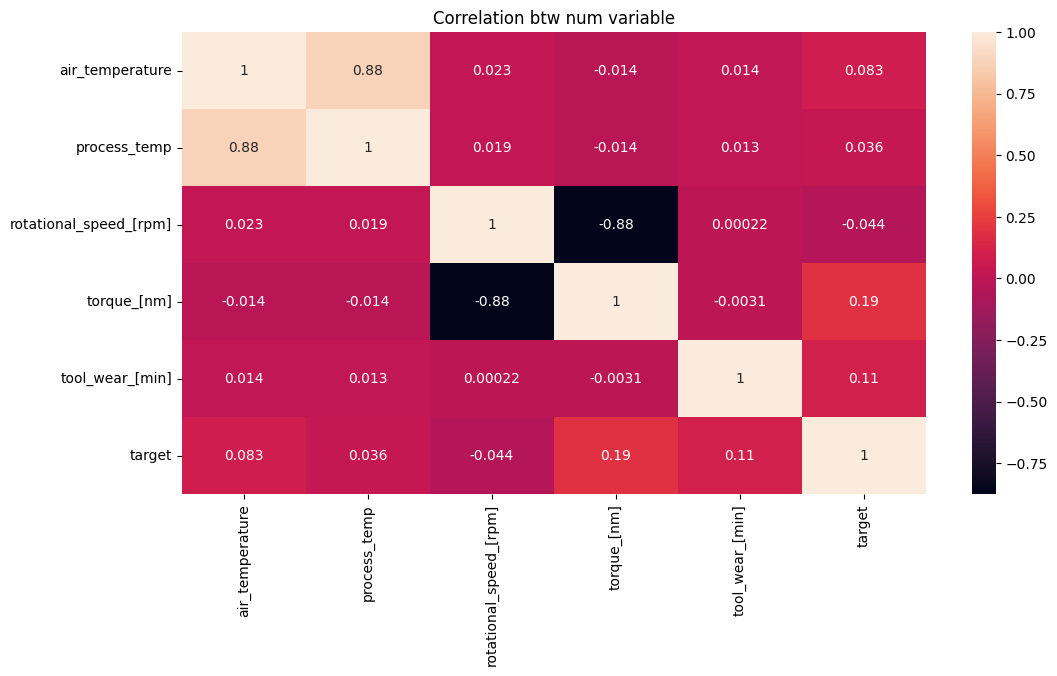

In [47]:
corr = df[num_col + ['target']].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr , annot=True ,cmap='rocket')
plt.title('Correlation btw num variable')

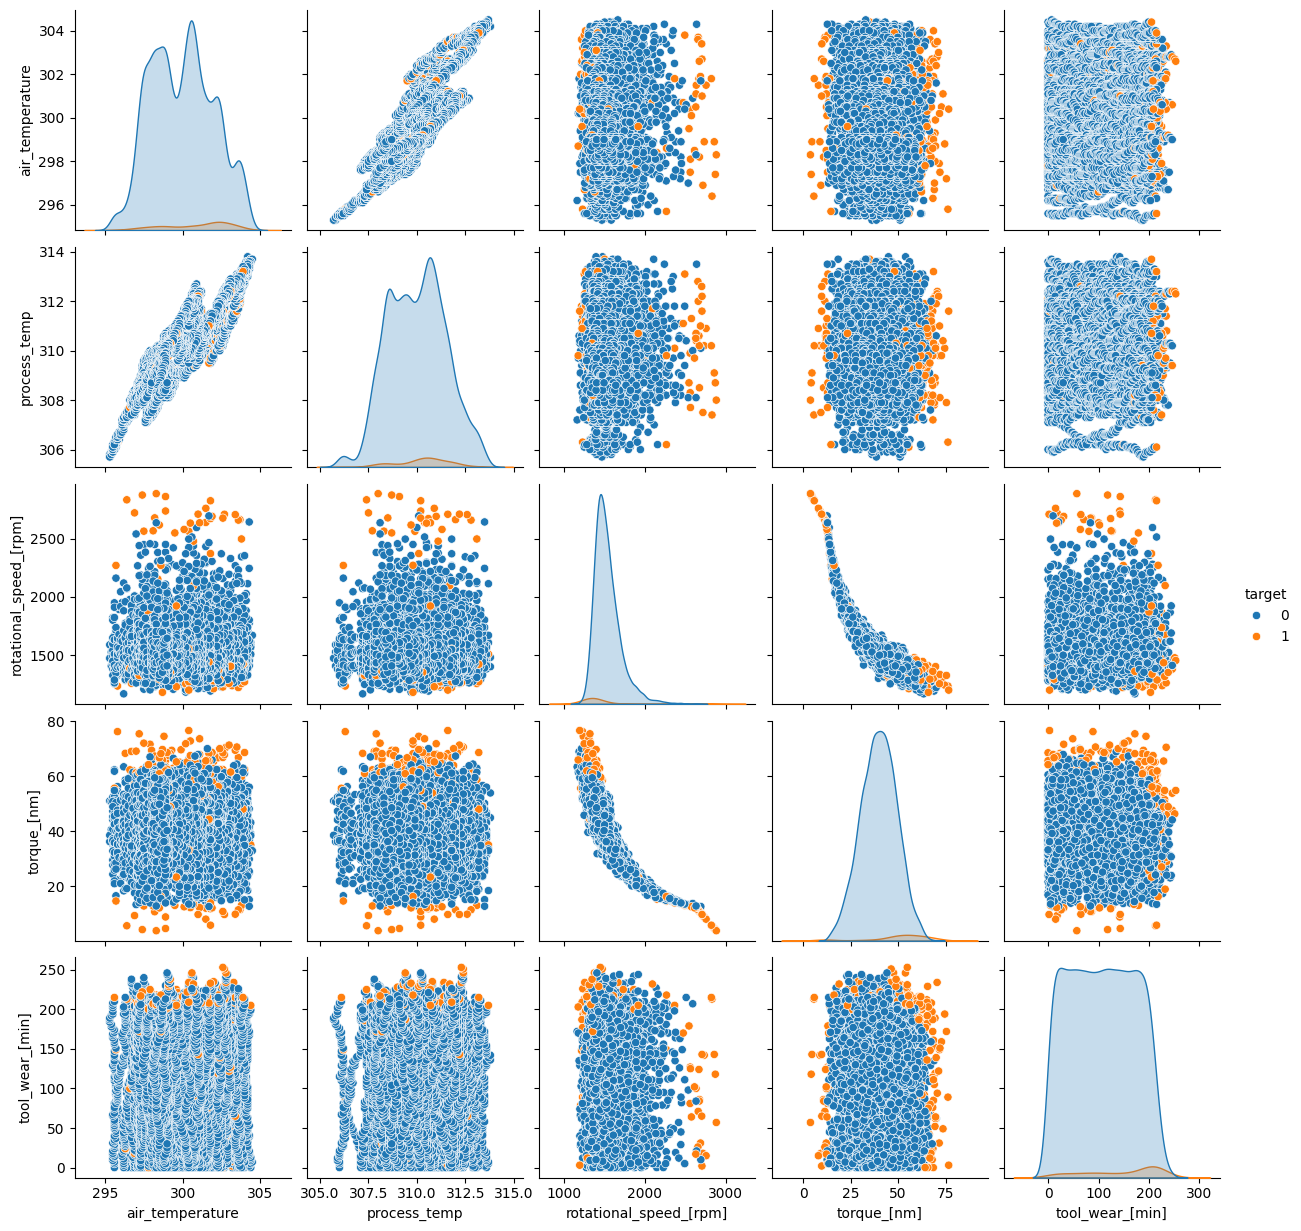

In [48]:
sns.pairplot(df[num_col+['target']] , hue='target')

### AVerage value by target 

Air_Temperature
air_temperature
299.973999    0.5
300.886431    0.5
Name: proportion, dtype: float64


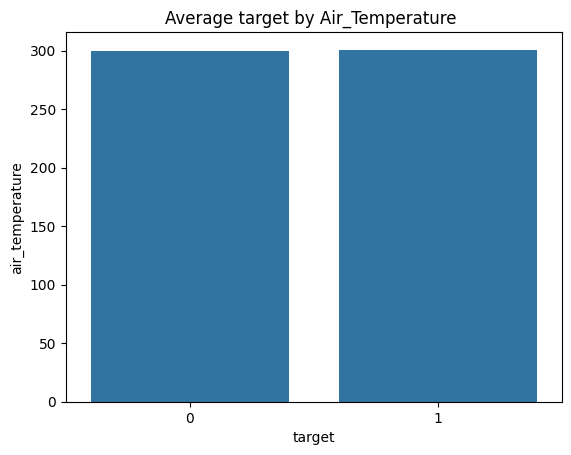

Process_Temp
process_temp
309.995570    0.5
310.290265    0.5
Name: proportion, dtype: float64


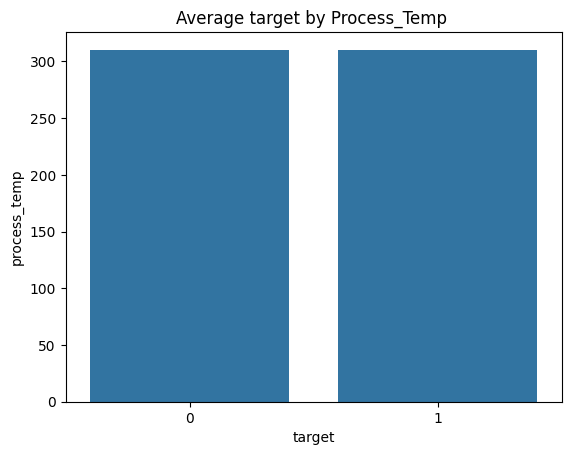

Rotational_Speed_[Rpm]
rotational_speed_[rpm]
1540.260014    0.5
1496.486726    0.5
Name: proportion, dtype: float64


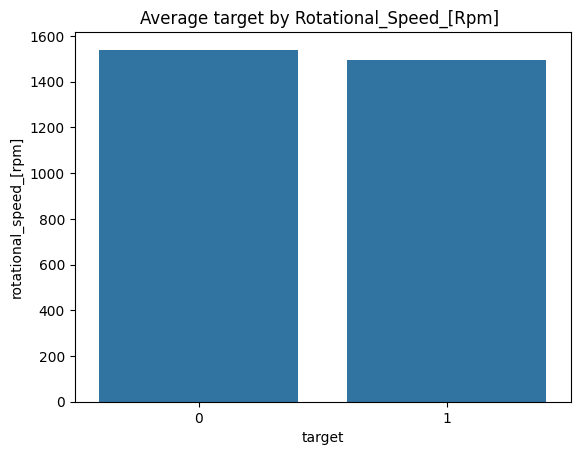

Torque_[Nm]
torque_[nm]
39.629655    0.5
50.168142    0.5
Name: proportion, dtype: float64


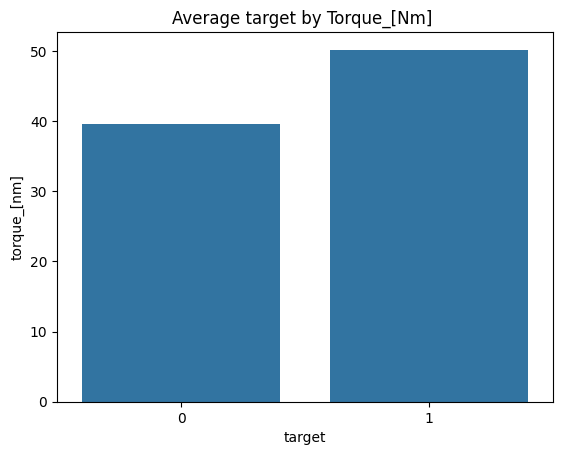

Tool_Wear_[Min]
tool_wear_[min]
106.693717    0.5
143.781711    0.5
Name: proportion, dtype: float64


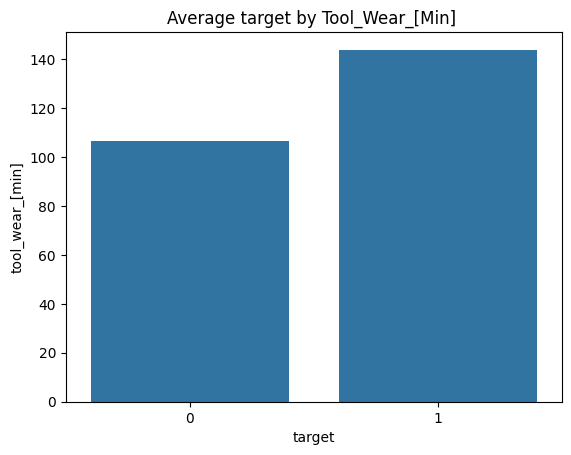

In [79]:
for col in num_col:
    avg_target = df.groupby('target')[col].mean()
    print(col.title())
    print("=========================")
    print(avg_target.value_counts(normalize=True))
    sns.barplot(avg_target)
    plt.title(f'Average target by { col.title()} ')
    plt.show()

## Exploring failure by category

=============== Type ===============
type
H    0.020937
L    0.039167
M    0.027694
Name: target, dtype: float64


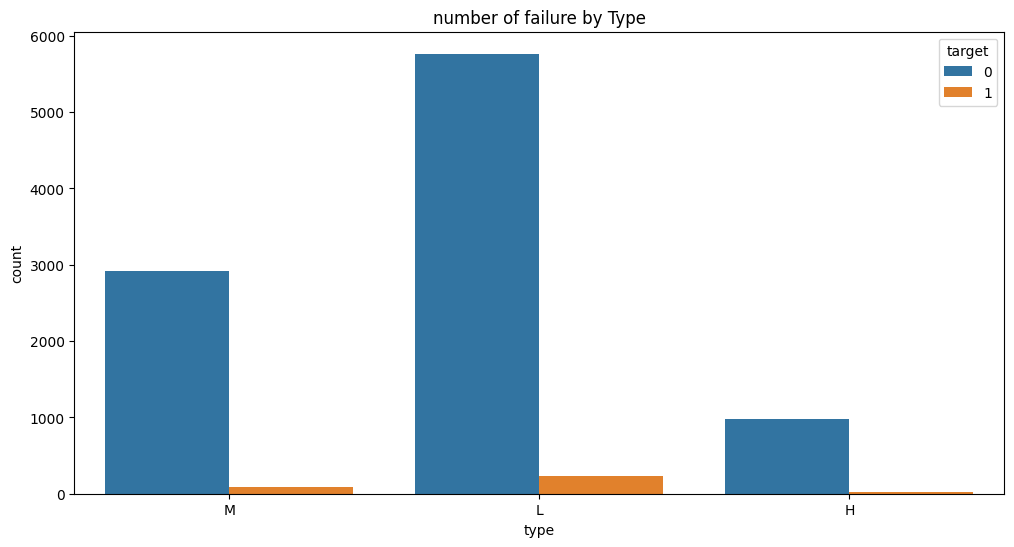

=============== Failure_Type ===============
failure_type
heat dissipation failure    1.000000
no failure                  0.000932
overstrain failure          1.000000
power failure               1.000000
random failures             0.000000
tool wear failure           1.000000
Name: target, dtype: float64


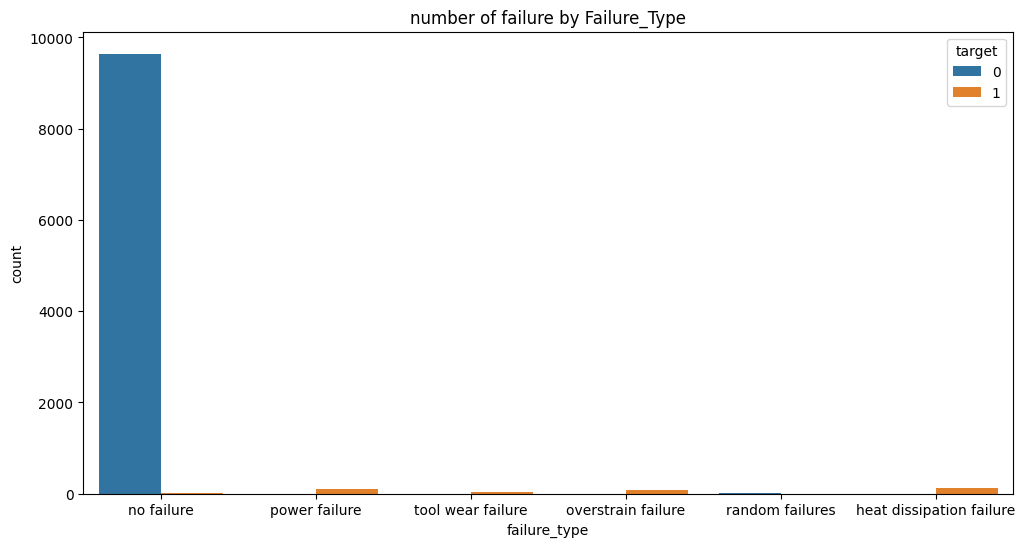

In [83]:
for cols in cat_cols:
    failure = df.groupby(cols)['target'].mean()
    print('===============',cols.title(), '===============')
    print(failure)


    plt.figure(figsize=(12,6))
    sns.countplot(x=df[cols].astype(str), hue=df['target'])
    plt.title(f'number of failure by {cols.title()}')
    plt.show()

## Check Mutual Infomation Score Btw Categorical Viarible And Target

In [64]:
from sklearn.metrics import mutual_info_score

In [67]:
df[cat_cols].apply(
    lambda features : mutual_info_score(df['target'] , features)
).sort_values(ascending = False)

failure_type    0.140868
type            0.000727
dtype: float64

## Key Takeaways


* The dataset contains 10000 rows and 8 columns
* Approxiamately 96% of the machine have no failure while 3% have failed
* Machine that fails tends to have more tool wear 
* Machine that fails tends to have higher torque i.e works harder
* the rotational spend btw machine seems to be same 
* the process temperature and air temp seems same for all machine 